In [1]:
#importa os modulos
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#carrega o dataset
df = pd.read_csv("datasetDog_v.2_WithActivity.csv")

In [3]:
#verificando o formato dos dados
df.shape

(516, 9)

In [4]:
#verificando as primeiras linhas do dataset
df.head(6)

,time_window,device,absolute_deviation,standard_deviation,arithmetic_average,RMS,median,variance,activity
0,14:36:38,accX,0.1040,0.124036,65.000,0.140036,0.090,0.015385,stopped
1,14:36:38,accY,0.0282,0.036069,-0.007,0.036742,-0.020,0.001301,stopped
2,14:36:38,accZ,0.0320,0.043417,925.000,0.926018,0.930,0.001885,stopped
3,14:36:38,girX,12748.0000,16.690349,-5.710,17.640063,-0.055,278.567740,stopped
4,14:36:38,girY,33.1768,49.317552,-14892.000,51.516916,195.000,2432.220956,stopped
5,14:36:38,girZ,9.7610,14.912854,1.237,14.964069,1.560,222.393201,stopped


In [5]:
#verificando as ultimas linhas do dataset
df.tail(6)

,time_window,device,absolute_deviation,standard_deviation,arithmetic_average,RMS,median,variance,activity
510,15:17:00,accX,0.2612,0.307838,0.594,0.669029,0.695,0.094764,walking
511,15:17:00,accY,0.1200,0.154648,-0.052,0.163156,-0.050,0.023916,walking
512,15:17:00,accZ,0.1548,0.191165,666.000,0.692892,685.000,0.036544,walking
513,15:17:00,girX,21.2392,26.346267,6.916,27.238885,1.445,694.125804,walking
514,15:17:00,girY,14.7552,17.696525,7.036,19.043957,1465.000,313.166984,walking
515,15:17:00,girZ,10.8792,17.882549,3.546,18.230734,1.885,319.785544,walking


In [6]:
#verificando se existe valores nulos no dataset
df.isnull().values.any()

False

In [7]:
#Identificando a correlacao entre as variaveis
#Correlacao nao implica casualidade
def plot_corr (df, size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize = (size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

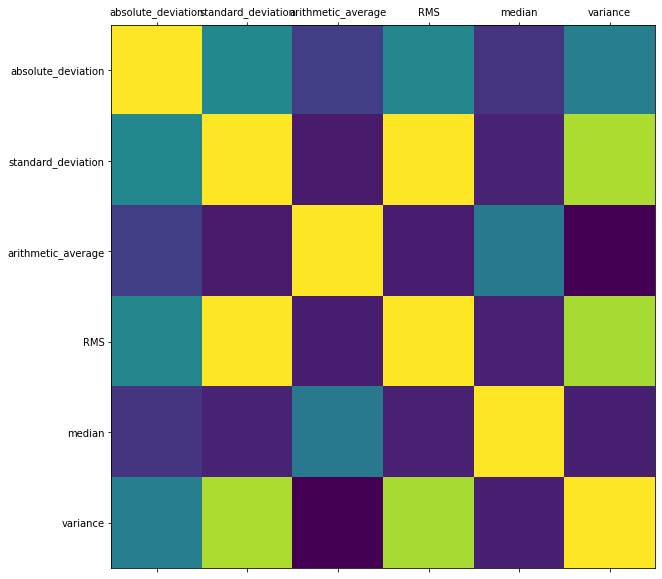

In [8]:
#criando o grafico
plot_corr(df)

In [9]:
#Visualizando a correlacao em tabela
#Coeficientes:
#+1 = Forte corr. positiva | 0 = nao existe correlacao | -1 Forte corr. negativa
df.corr()

,absolute_deviation,standard_deviation,arithmetic_average,RMS,median,variance
absolute_deviation,1.000000,0.370879,0.036303,0.364619,-0.001178,0.324406
standard_deviation,0.370879,1.000000,-0.094227,0.997347,-0.064351,0.853333
arithmetic_average,0.036303,-0.094227,1.000000,-0.090997,0.296099,-0.181120
RMS,0.364619,0.997347,-0.090997,1.000000,-0.073792,0.845309
median,-0.001178,-0.064351,0.296099,-0.073792,1.000000,-0.075346
variance,0.324406,0.853333,-0.181120,0.845309,-0.075346,1.000000


In [10]:
#defini o mapeamento
map_activity = {'sitting':0, 'running':1, 'walking':2, 'jumping':3, 'lying_down':4, 'stopped':5}

In [11]:
#aplica o mapeamento ao dataset
df['activity'] = df['activity'].map(map_activity)

In [12]:
#verificando as primeiras linhas do dataset
df.head(6)

,time_window,device,absolute_deviation,standard_deviation,arithmetic_average,RMS,median,variance,activity
0,14:36:38,accX,0.1040,0.124036,65.000,0.140036,0.090,0.015385,5
1,14:36:38,accY,0.0282,0.036069,-0.007,0.036742,-0.020,0.001301,5
2,14:36:38,accZ,0.0320,0.043417,925.000,0.926018,0.930,0.001885,5
3,14:36:38,girX,12748.0000,16.690349,-5.710,17.640063,-0.055,278.567740,5
4,14:36:38,girY,33.1768,49.317552,-14892.000,51.516916,195.000,2432.220956,5
5,14:36:38,girZ,9.7610,14.912854,1.237,14.964069,1.560,222.393201,5


In [13]:
#verificando a distribuicao dos dados
num_sitting = len(df.loc[df['activity'] == 0 ])
num_running = len(df.loc[df['activity'] == 1 ])
num_walking = len(df.loc[df['activity'] == 2 ])
num_jumping = len(df.loc[df['activity'] == 3 ])
num_lying_down = len(df.loc[df['activity'] == 4 ])
num_stopped = len(df.loc[df['activity'] == 5 ])

#verifica o total de ocorrencias
total = num_sitting + num_running + num_walking + num_jumping + num_lying_down + num_stopped

#imprime a distribuicao reconhecida
print("Ocorrência da atividade 'sentado': {0} ({1:2.2f}%)".format(num_sitting, (num_sitting / total)*100))
print("Ocorrência da atividade 'correndo': {0} ({1:2.2f}%)".format(num_running, (num_running / total)*100))
print("Ocorrência da atividade 'caminhando': {0} ({1:2.2f}%)".format(num_walking, (num_walking / total)*100))
print("Ocorrência da atividade 'pulando': {0} ({1:2.2f}%)".format(num_jumping, (num_jumping / total)*100))
print("Ocorrência da atividade 'deitado': {0} ({1:2.2f}%)".format(num_lying_down, (num_lying_down / total)*100))
print("Ocorrência da atividade 'parado': {0} ({1:2.2f}%)".format(num_stopped, (num_stopped / total)*100))



Ocorrência da atividade 'sentado': 36 (6.98%)
Ocorrência da atividade 'correndo': 0 (0.00%)
Ocorrência da atividade 'caminhando': 162 (31.40%)
Ocorrência da atividade 'pulando': 60 (11.63%)
Ocorrência da atividade 'deitado': 120 (23.26%)
Ocorrência da atividade 'parado': 138 (26.74%)


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
#Seleciona as variaveis
features = ['absolute_deviation', 'standard_deviation', 'arithmetic_average', 'RMS', 'median', 'variance']

In [16]:
#Defini a variavel a ser prevista
feat_predicted = ['activity']

In [17]:
#Cria os objetos
X = df[features].values
Y = df[feat_predicted].values

In [18]:
#Defini o tamanho da base de teste (split)
split_test_size = 0.80

In [19]:
#Criano dados de treino e de teste
X_training, X_test, Y_training, Y_test = train_test_split(X,Y, test_size = split_test_size, random_state=42)

In [20]:
#Imprime os resultados da definicao 
print("{0:0.2f}% para dados de treino".format((len(X_training)/len(df.index))*100))
print("{0:0.2f}% para dados de teste".format((len(X_test)/len(df.index))*100))

19.96% para dados de treino
80.04% para dados de teste


In [21]:
#Dados do dataset original
print("Original - Sentado : {0} ({1:0.2f}%)".format(len(df.loc[df['activity'] == 0]), (len(df.loc[df['activity'] == 0])/len(df.index)*100)))
print("Original - Correndo : {0} ({1:0.2f}%)".format(len(df.loc[df['activity'] == 1]), (len(df.loc[df['activity'] == 1])/len(df.index)*100)))
print("Original - Caminhando : {0} ({1:0.2f}%)".format(len(df.loc[df['activity'] == 2]), (len(df.loc[df['activity'] == 2])/len(df.index)*100)))
print("Original - Pulando : {0} ({1:0.2f}%)".format(len(df.loc[df['activity'] == 3]), (len(df.loc[df['activity'] == 3])/len(df.index)*100)))
print("Original - Deitado : {0} ({1:0.2f}%)".format(len(df.loc[df['activity'] == 4]), (len(df.loc[df['activity'] == 4])/len(df.index)*100)))
print("Original - Parado : {0} ({1:0.2f}%)".format(len(df.loc[df['activity'] == 5]), (len(df.loc[df['activity'] == 5])/len(df.index)*100)))
print("")
#Dados do dataset de treino
print("Treino - Sentado : {0} ({1:0.2f}%)".format(len(Y_training[Y_training[:] == 0]), (len(Y_training[Y_training[:] == 0])/len(Y_training)*100)))
print("Treino - Correndo : {0} ({1:0.2f}%)".format(len(Y_training[Y_training[:] == 1]), (len(Y_training[Y_training[:] == 1])/len(Y_training)*100)))
print("Treino - Caminhando : {0} ({1:0.2f}%)".format(len(Y_training[Y_training[:] == 2]), (len(Y_training[Y_training[:] == 2])/len(Y_training)*100)))
print("Treino - Pulando : {0} ({1:0.2f}%)".format(len(Y_training[Y_training[:] == 3]), (len(Y_training[Y_training[:] == 3])/len(Y_training)*100)))
print("Treino - Deitado : {0} ({1:0.2f}%)".format(len(Y_training[Y_training[:] == 4]), (len(Y_training[Y_training[:] == 4])/len(Y_training)*100)))
print("Treino - Parado : {0} ({1:0.2f}%)".format(len(Y_training[Y_training[:] == 5]), (len(Y_training[Y_training[:] == 5])/len(Y_training)*100)))
print("")
#Dados do dataset de teste
print("Teste - Sentado : {0} ({1:0.2f}%)".format(len(Y_test[Y_test[:] == 0]), (len(Y_test[Y_test[:] == 0])/len(Y_test)*100)))
print("Teste - Correndo : {0} ({1:0.2f}%)".format(len(Y_test[Y_test[:] == 1]), (len(Y_test[Y_test[:] == 1])/len(Y_test)*100)))
print("Teste - Caminhando : {0} ({1:0.2f}%)".format(len(Y_test[Y_test[:] == 2]), (len(Y_test[Y_test[:] == 2])/len(Y_test)*100)))
print("Teste - Pulando : {0} ({1:0.2f}%)".format(len(Y_test[Y_test[:] == 3]), (len(Y_test[Y_test[:] == 3])/len(Y_test)*100)))
print("Teste - Deitado : {0} ({1:0.2f}%)".format(len(Y_test[Y_test[:] == 4]), (len(Y_test[Y_test[:] == 4])/len(Y_test)*100)))
print("Teste - Parado : {0} ({1:0.2f}%)".format(len(Y_test[Y_test[:] == 5]), (len(Y_test[Y_test[:] == 5])/len(Y_test)*100)))
            

Original - Sentado : 36 (6.98%)
Original - Correndo : 0 (0.00%)
Original - Caminhando : 162 (31.40%)
Original - Pulando : 60 (11.63%)
Original - Deitado : 120 (23.26%)
Original - Parado : 138 (26.74%)

Treino - Sentado : 7 (6.80%)
Treino - Correndo : 0 (0.00%)
Treino - Caminhando : 32 (31.07%)
Treino - Pulando : 13 (12.62%)
Treino - Deitado : 28 (27.18%)
Treino - Parado : 23 (22.33%)

Teste - Sentado : 29 (7.02%)
Teste - Correndo : 0 (0.00%)
Teste - Caminhando : 130 (31.48%)
Teste - Pulando : 47 (11.38%)
Teste - Deitado : 92 (22.28%)
Teste - Parado : 115 (27.85%)


In [22]:
df.head(5)

,time_window,device,absolute_deviation,standard_deviation,arithmetic_average,RMS,median,variance,activity
0,14:36:38,accX,0.1040,0.124036,65.000,0.140036,0.090,0.015385,5
1,14:36:38,accY,0.0282,0.036069,-0.007,0.036742,-0.020,0.001301,5
2,14:36:38,accZ,0.0320,0.043417,925.000,0.926018,0.930,0.001885,5
3,14:36:38,girX,12748.0000,16.690349,-5.710,17.640063,-0.055,278.567740,5
4,14:36:38,girY,33.1768,49.317552,-14892.000,51.516916,195.000,2432.220956,5


In [23]:
print("Linhas do dataframe - {0}".format(len(df)))
print("Linhas 'perdidas' no desvio absoluto - {0}".format(len(df.loc[df['absolute_deviation'] == 0])))
print("Linhas 'perdidas' no desvio padrão - {0}".format(len(df.loc[df['standard_deviation'] == 0])))
print("Linhas 'perdidas' na média aritmética - {0}".format(len(df.loc[df['arithmetic_average'] == 0])))
print("Linhas 'perdidas' na média quadrática - {0}".format(len(df.loc[df['RMS'] == 0])))
print("Linhas 'perdidas' na mediana - {0}".format(len(df.loc[df['median'] == 0])))
print("Linhas 'perdidas' na variância - {0}".format(len(df.loc[df['variance'] == 0])))

Linhas do dataframe - 516
Linhas 'perdidas' no desvio absoluto - 0
Linhas 'perdidas' no desvio padrão - 0
Linhas 'perdidas' na média aritmética - 0
Linhas 'perdidas' na média quadrática - 0
Linhas 'perdidas' na mediana - 5
Linhas 'perdidas' na variância - 0


In [24]:
from sklearn.impute import SimpleImputer

In [25]:
#Criando objeto
exchange_Zero = SimpleImputer(missing_values = 0, strategy = "mean")

#Substituindo os valores iguais a zero pela media dos dados
X_training = exchange_Zero.fit_transform(X_training)
X_test = exchange_Zero.fit_transform(X_test)

In [26]:
#Defini o modelo GaussianProcess
from sklearn.gaussian_process import GaussianProcessClassifier

model =  GaussianProcessClassifier()
model.fit(X_training, Y_training.ravel())



GaussianProcessClassifier()

In [27]:
#Calcula a acuracia

model.score(X_test, Y_test)

0.3220338983050847